In [39]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

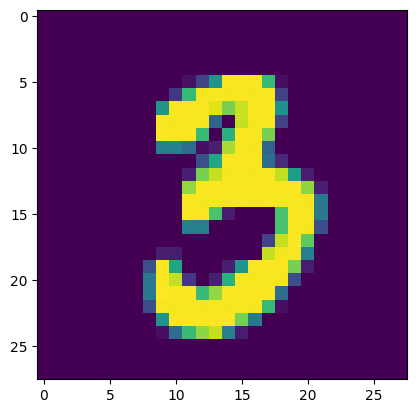

In [40]:
# Cargar datos de entrenamiento y prueba
(x_train, y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

# Forma de las imagenes 28 x 28 pixeles (60 000 imágenes)
x_train.shape

# Mostrar imagen de la posición
plt.imshow(x_train[890])

In [41]:
# Estandarizar los valores entre 0 y 1 pixeles (0,255)
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [42]:
# Cambiar forma de los datos de entrada a 28x28 y a blanco/negro (1) color (3)
x_train = x_train.reshape(-1,28,28,1) # -1 establece automáticamente la dimensión
x_test = x_test.reshape(-1,28,28,1)

In [43]:
# Crear arquitectura de la red neuronal
modelo = keras.Sequential()
# Capa convolucion (#filtros,kernel,fun activacion, forma entrada)
capa_convolucion = Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1))
# Capa agrupamiento 
capa_agrupamiento = MaxPooling2D(pool_size=(2,2))
# Capa aplanamiento
capa_aplanamiento = Flatten()
# Capas densas (escondidas)
capa_oculta = Dense(units=64,activation="relu")
# Capas salida
capa_salida = Dense(units=10,activation="softmax")

modelo = keras.Sequential([capa_convolucion, capa_agrupamiento, capa_aplanamiento, capa_oculta, capa_salida])

# Compilar el modelo
modelo.compile(optimizer='adam', loss='categorical_crossentropy',metrics=["accuracy"])
# Entrenar el modelo
y_train=keras.utils.to_categorical(y_train, num_classes=10)
y_test=keras.utils.to_categorical(y_test, num_classes=10)
modelo.fit(x_train, y_train, batch_size=128, epochs=5)

Epoch 1/5
469/469 [==============================] - 8s 16ms/step - loss: 0.2576 - accuracy: 0.9259
Epoch 2/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0766 - accuracy: 0.9781
Epoch 3/5
469/469 [==============================] - 7s 16ms/step - loss: 0.0550 - accuracy: 0.9837
Epoch 4/5
469/469 [==============================] - 7s 16ms/step - loss: 0.0430 - accuracy: 0.9874
Epoch 5/5
469/469 [==============================] - 7s 16ms/step - loss: 0.0345 - accuracy: 0.9899


In [44]:
# Evaluar el modelo con los datos de prueba
perdida = modelo.evaluate(x_test,y_test)
print("La funcion de perdida es:", perdida[0])
print("La precision es:", perdida[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0506 - accuracy: 0.9837
La funcion de perdida es: 0.05060368776321411
La precision es: 0.9836999773979187


1/1 [==============================] - 0s 18ms/step
La imagen se clasifica como: 4


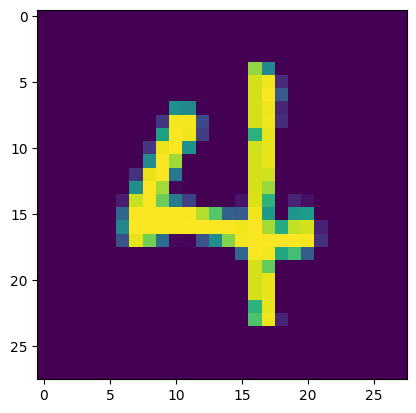

In [53]:
# Leer imagen
imagen = x_test[5900]
plt.imshow(imagen)

# Agregar una dimensión adicional para representar el canal de color (escala de grises)
imagen = np.expand_dims(imagen, axis=-1)

# Agregar una dimensión adicional para representar el lote de imágenes
imagen = np.expand_dims(imagen, axis=0)

# Realizar la predicción
prediccion = modelo.predict(imagen)
predicted_class = np.argmax(prediccion[0])

# Imprimir la clase predicha
print("La imagen se clasifica como:", predicted_class)